        program_name   month  unique_clients  total_hours
0  Behavioral Health  2025Q1              12    16.783333
1  Behavioral Health  2025Q2              13    18.366667
2  Behavioral Health  2025Q3              12    17.216667
3    Case Management  2025Q1              18    28.183333
4    Case Management  2025Q2              11    13.133333


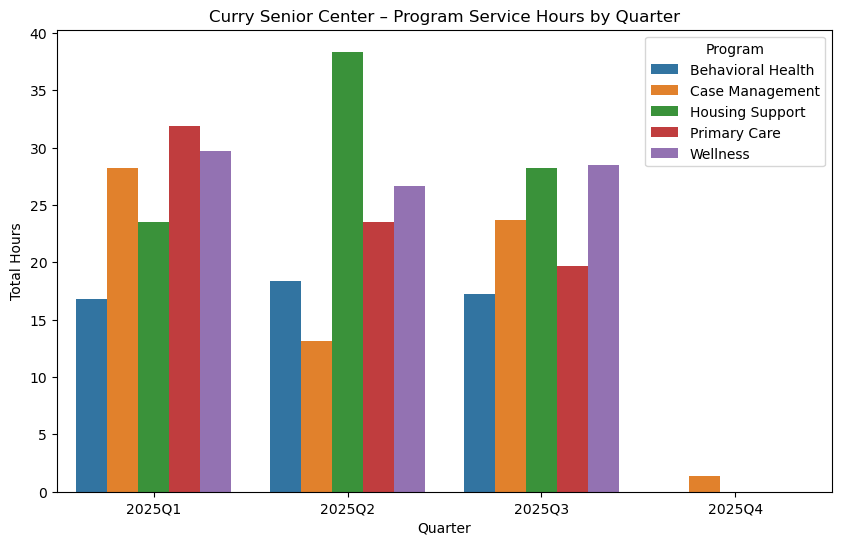

        program_name  improvement
0  Behavioral Health    16.580714
1    Case Management    21.506520
2    Housing Support    20.522260
3       Primary Care    15.888669
4           Wellness    20.684618


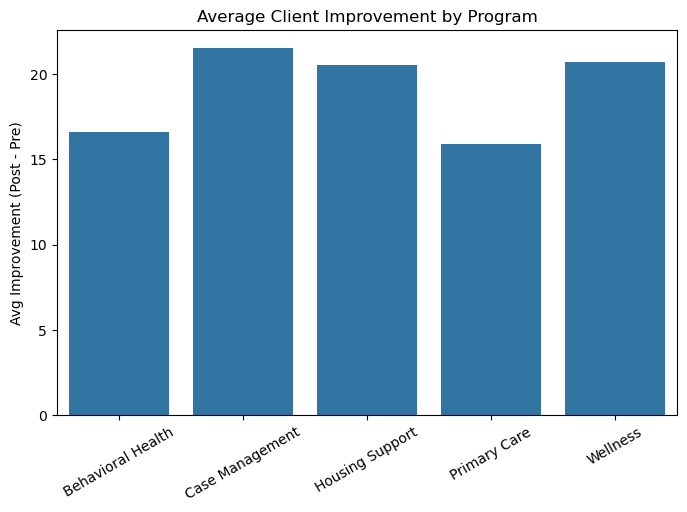

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



# --- 1. Simulate Curry Senior Center data ---

np.random.seed(42)



programs = ["Case Management", "Primary Care", "Behavioral Health", "Housing Support", "Wellness"]

clients = pd.DataFrame({

    "client_id": range(1, 51),

    "age": np.random.randint(60, 90, 50),

    "gender": np.random.choice(["Male", "Female"], 50),

    "ethnicity": np.random.choice(["White", "Black", "Asian", "Latino"], 50)

})



services = pd.DataFrame({

    "service_id": range(1, 300),

    "client_id": np.random.choice(clients["client_id"], 299),

    "program_name": np.random.choice(programs, 299),

    "service_date": pd.to_datetime(np.random.choice(pd.date_range("2025-01-01", "2025-10-01"), 299)),

    "service_minutes": np.random.randint(30, 120, 299),

    "service_cost": np.random.uniform(50, 250, 299),

    "referral_source": np.random.choice(["DAS", "Hospital", "Walk-in", "Family"], 299)

})



outcomes = pd.DataFrame({

    "client_id": np.random.choice(clients["client_id"], 100),

    "program_name": np.random.choice(programs, 100),

    "pre_score": np.random.uniform(40, 80, 100),

    "post_score": np.random.uniform(60, 100, 100)

})



# --- 2. Quarterly report (unique clients, total hours) ---

quarterly = (

    services.assign(month=services["service_date"].dt.to_period("Q"))

    .groupby(["program_name", "month"])

    .agg(unique_clients=("client_id", "nunique"),

         total_hours=("service_minutes", lambda x: x.sum() / 60))

    .reset_index()

)



print(quarterly.head())



# --- 3. Visualization: Program Hours by Quarter ---

plt.figure(figsize=(10,6))

sns.barplot(data=quarterly, x="month", y="total_hours", hue="program_name")

plt.title("Curry Senior Center – Program Service Hours by Quarter")

plt.ylabel("Total Hours")

plt.xlabel("Quarter")

plt.legend(title="Program")

plt.show()



# --- 4. Outcome Improvement Analysis ---

outcomes["improvement"] = outcomes["post_score"] - outcomes["pre_score"]

improve_summary = outcomes.groupby("program_name")["improvement"].mean().reset_index()



print(improve_summary)



# --- 5. Visualization: Average Outcome Improvement ---

plt.figure(figsize=(8,5))

sns.barplot(data=improve_summary, x="program_name", y="improvement")

plt.title("Average Client Improvement by Program")

plt.ylabel("Avg Improvement (Post - Pre)")

plt.xlabel("")

plt.xticks(rotation=30)

plt.show()

In [5]:
clients

,client_id,age,gender,ethnicity
0,1,66,Female,Latino
1,2,79,Male,Black
2,3,88,Female,Black
3,4,74,Female,Black
4,5,70,Male,Latino
5,6,67,Male,Black
6,7,88,Male,Asian
7,8,80,Male,Latino
8,9,66,Male,Asian
9,10,85,Male,Latino


In [13]:
services

,service_id,client_id,program_name,service_date,service_minutes,service_cost,referral_source
0,1,5,Case Management,2025-07-20,37,169.657212,DAS
1,2,42,Housing Support,2025-07-31,34,141.936303,DAS
2,3,39,Wellness,2025-08-08,58,65.186682,DAS
3,4,41,Housing Support,2025-08-28,76,65.553069,DAS
4,5,28,Case Management,2025-02-15,97,50.467878,Hospital
...,...,...,...,...,...,...,...
294,295,50,Wellness,2025-08-16,46,92.069916,Walk-in
295,296,25,Case Management,2025-08-04,30,119.203314,Family
296,297,24,Housing Support,2025-07-03,118,205.160947,Hospital
297,298,13,Behavioral Health,2025-01-15,90,238.247501,Family


In [25]:
services.groupby("program_name")['service_id'].count()

program_name
Behavioral Health    44
Case Management      57
Housing Support      69
Primary Care         59
Wellness             70
Name: service_id, dtype: int64

In [26]:
services.groupby("program_name").size()

program_name
Behavioral Health    44
Case Management      57
Housing Support      69
Primary Care         59
Wellness             70
dtype: int64

In [31]:
outcomes

,client_id,program_name,pre_score,post_score,improvement
0,45,Behavioral Health,46.720568,95.118973,48.398405
1,16,Primary Care,69.474950,94.722268,25.247318
2,50,Primary Care,74.511883,92.237016,17.725133
3,42,Case Management,48.669592,91.601217,42.931625
4,8,Behavioral Health,43.828582,72.187166,28.358583
...,...,...,...,...,...
95,35,Housing Support,48.340421,89.494283,41.153863
96,44,Primary Care,77.223809,79.040725,1.816917
97,38,Case Management,44.654656,75.035531,30.380875
98,26,Primary Care,72.697988,75.779051,3.081063
